<a href="https://www.kaggle.com/code/mosesmoncy/diamond-price-prediction?scriptVersionId=126867183" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

Diamond forms under high temperature and pressure conditions that exist only about 100 miles beneath the earth’s surface. Diamond’s carbon atoms are bonded in essentially the same way in all directions. Another mineral, graphite, also contains only carbon, but its formation process and crystal structure are very different.

This project is based on analysis and prediction of diamonds. In these days diamonds are very costly , so the buyer can face difficulties or abrupt changes in prices. Using this project they can find the best diamon for their utility. This project is made with ❤️.



In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [2]:
a=pd.read_csv('/kaggle/input/diamond-price-dataset/diamonds.csv')
a

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [3]:
a.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
a.tail()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,53940,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


In [5]:
a.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'x', 'y', 'z'],
      dtype='object')

In [6]:
a.dtypes

Unnamed: 0      int64
carat         float64
cut            object
color          object
clarity        object
depth         float64
table         float64
price           int64
x             float64
y             float64
z             float64
dtype: object

In [7]:
a.isna().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

<AxesSubplot:xlabel='table', ylabel='count'>

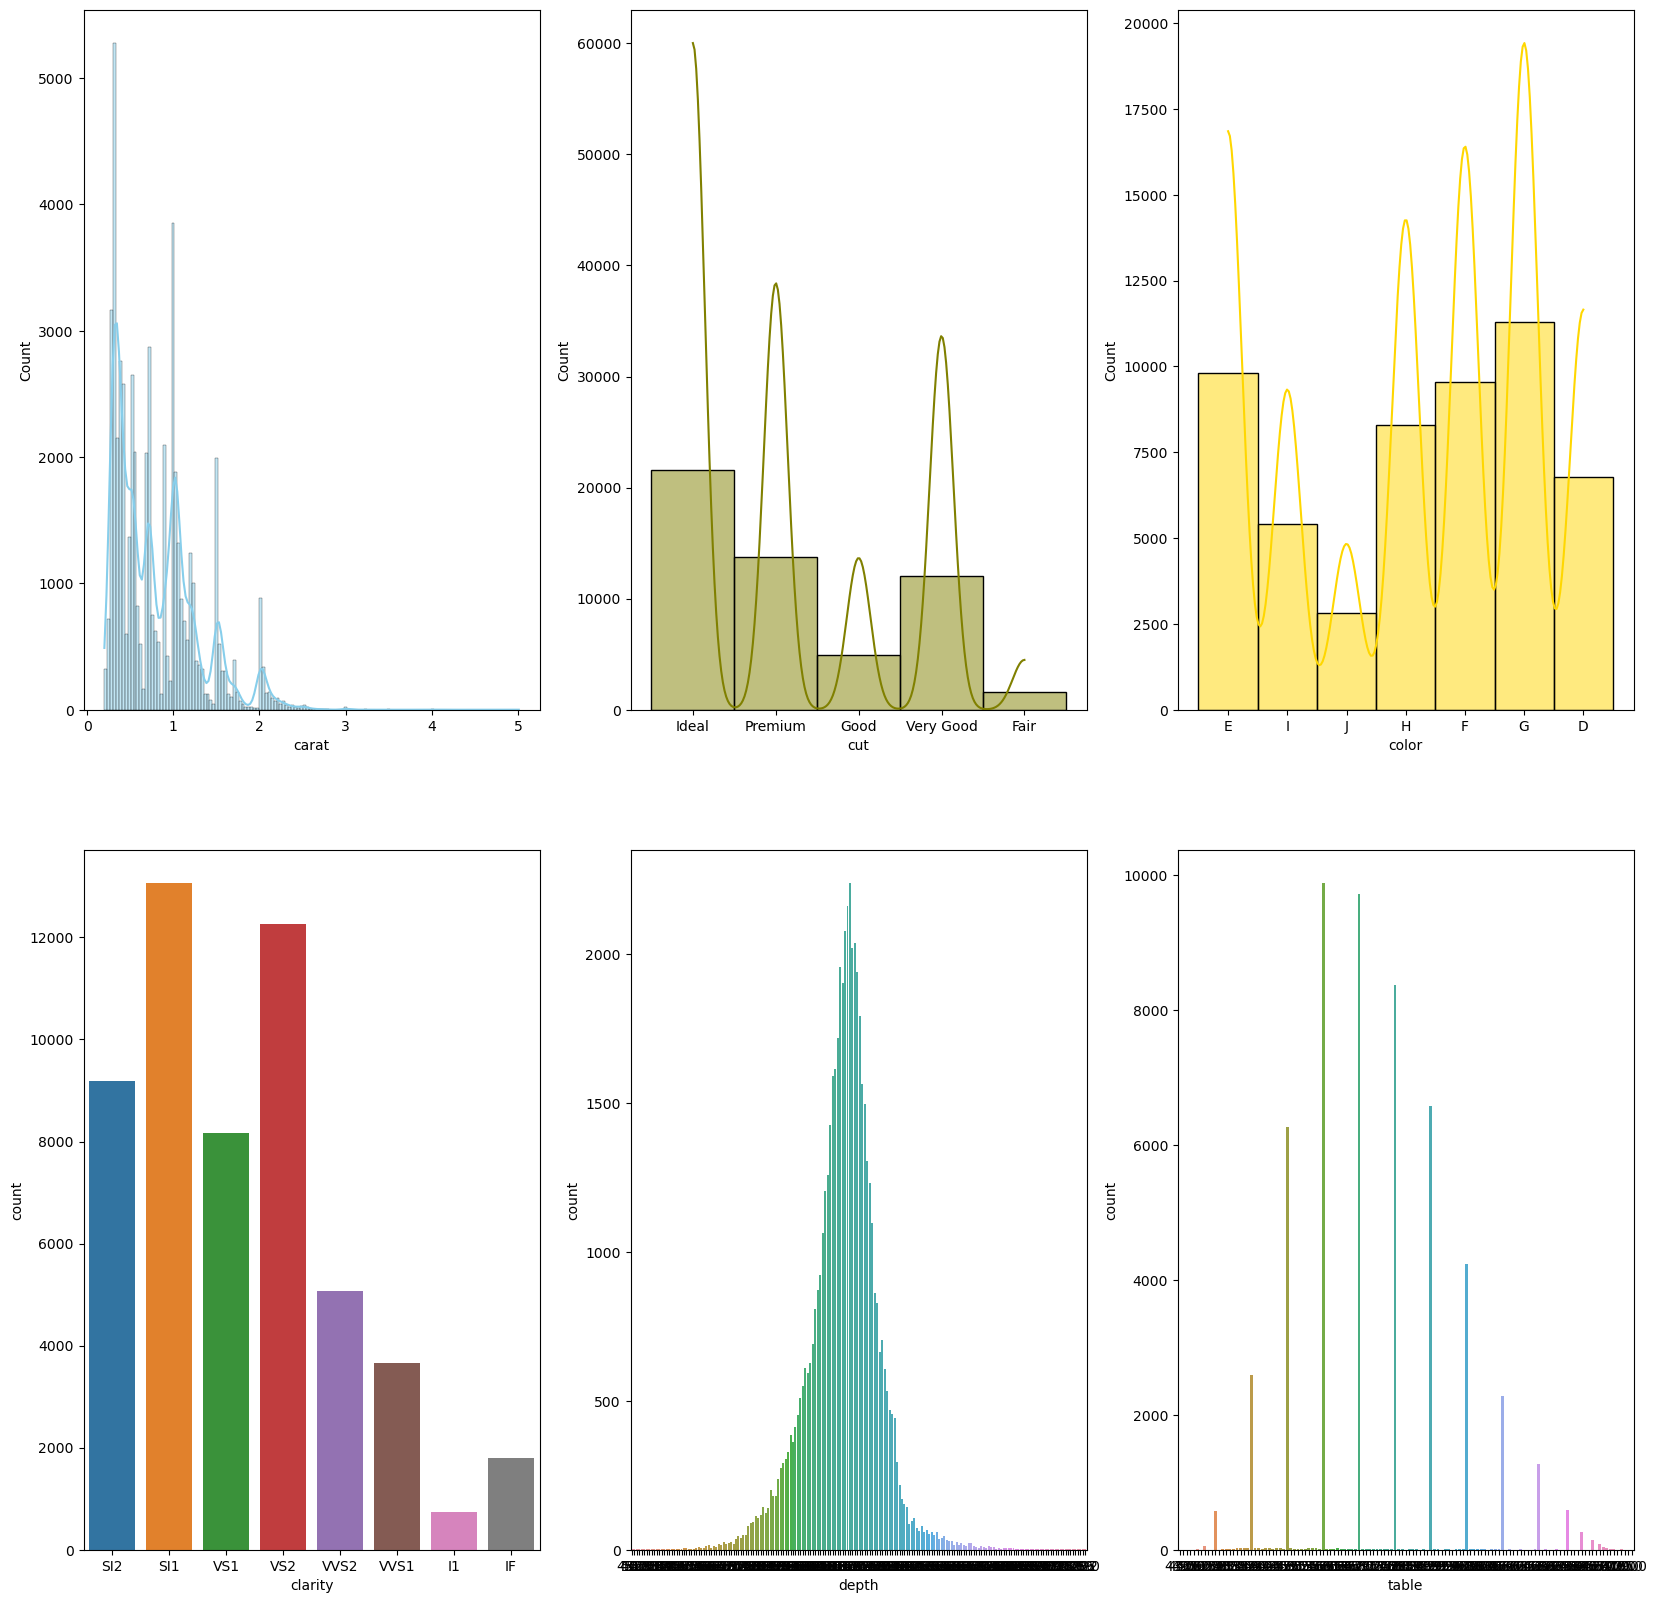

In [8]:
fig, axs = plt.subplots(2, 3, figsize=(20, 20))
sns.histplot(data=a["carat"], kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=a["cut"], kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=a["color"], kde=True, color="gold", ax=axs[0, 2])
sns.countplot(x = a["clarity"], ax=axs[1, 0])

sns.countplot(x = a["depth"], ax=axs[1, 1])
sns.countplot(x = a["table"], ax=axs[1, 2])


In [9]:
# converting object into numerical values

# applying get dummy  Encoding Technique

a1=pd.get_dummies(a[['cut','color','clarity']],drop_first=True)
a1

,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,color_F,color_G,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
53936,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
53937,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
53938,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0


In [10]:
# joining encoded dataset and actual dataset

a2=pd.concat([a,a1],axis=1)
a2

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,...,0,0,0,0,0,1,0,0,0,0
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,...,0,0,0,0,1,0,0,0,0,0
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,...,0,0,0,0,0,0,1,0,0,0
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,...,0,1,0,0,0,0,0,1,0,0
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,...,0,0,0,0,1,0,0,0,0,0
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,...,0,0,0,0,1,0,0,0,0,0
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,...,0,0,0,0,1,0,0,0,0,0
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,...,1,0,0,0,0,1,0,0,0,0


In [11]:
a2.dtypes

Unnamed: 0         int64
carat            float64
cut               object
color             object
clarity           object
depth            float64
table            float64
price              int64
x                float64
y                float64
z                float64
cut_Good           uint8
cut_Ideal          uint8
cut_Premium        uint8
cut_Very Good      uint8
color_E            uint8
color_F            uint8
color_G            uint8
color_H            uint8
color_I            uint8
color_J            uint8
clarity_IF         uint8
clarity_SI1        uint8
clarity_SI2        uint8
clarity_VS1        uint8
clarity_VS2        uint8
clarity_VVS1       uint8
clarity_VVS2       uint8
dtype: object

In [12]:
# dropping of object datatypes

a2=a2.drop(['Unnamed: 0'],axis=1)
a2

,carat,cut,color,clarity,depth,table,price,x,y,z,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,...,0,0,0,0,0,1,0,0,0,0
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,...,0,0,0,0,1,0,0,0,0,0
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,...,0,0,0,0,0,0,1,0,0,0
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,...,0,1,0,0,0,0,0,1,0,0
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,...,0,0,0,0,1,0,0,0,0,0
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,...,0,0,0,0,1,0,0,0,0,0
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,...,0,0,0,0,1,0,0,0,0,0
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,...,1,0,0,0,0,1,0,0,0,0


In [13]:
a2=a2.drop(['cut','color','clarity'],axis=1)
a2

,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,1,...,0,1,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,1,0,0,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,0,1,0,...,0,0,0,0,1,0,0,0,0,0
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,1,0,0,...,0,0,0,0,1,0,0,0,0,0
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,0,0,0,...,0,0,0,0,1,0,0,0,0,0
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,0,0,1,...,1,0,0,0,0,1,0,0,0,0


In [14]:
a2.dtypes

carat            float64
depth            float64
table            float64
price              int64
x                float64
y                float64
z                float64
cut_Good           uint8
cut_Ideal          uint8
cut_Premium        uint8
cut_Very Good      uint8
color_E            uint8
color_F            uint8
color_G            uint8
color_H            uint8
color_I            uint8
color_J            uint8
clarity_IF         uint8
clarity_SI1        uint8
clarity_SI2        uint8
clarity_VS1        uint8
clarity_VS2        uint8
clarity_VVS1       uint8
clarity_VVS2       uint8
dtype: object

In [15]:
# splitting dataframe a2 into inputs(x) and output(y)

x=a2.drop(['price'],axis=1)
y=a2['price']
x

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,3.95,3.98,2.43,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,3.89,3.84,2.31,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,4.05,4.07,2.31,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,4.20,4.23,2.63,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,4.34,4.35,2.75,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,5.75,5.76,3.50,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
53936,0.72,63.1,55.0,5.69,5.75,3.61,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
53937,0.70,62.8,60.0,5.66,5.68,3.56,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
53938,0.86,61.0,58.0,6.15,6.12,3.74,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0


In [16]:
y

0         326
1         326
2         327
3         334
4         335
         ... 
53935    2757
53936    2757
53937    2757
53938    2757
53939    2757
Name: price, Length: 53940, dtype: int64

<AxesSubplot:xlabel='carat', ylabel='price'>

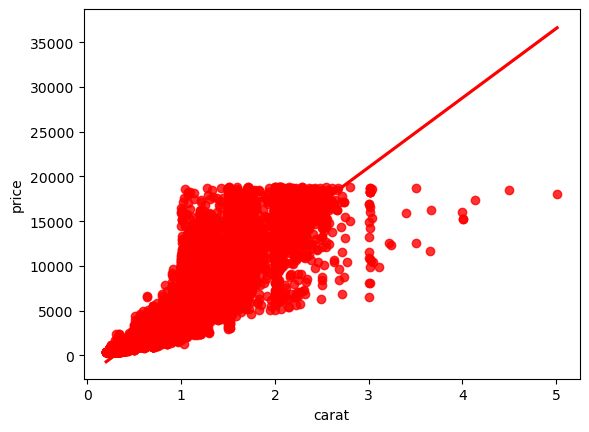

In [17]:
sns.regplot(x=a2['carat'],y=y,color='red')

<AxesSubplot:xlabel='depth', ylabel='price'>

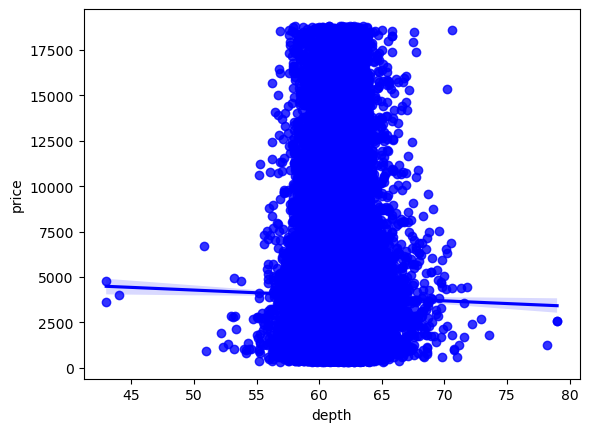

In [18]:
sns.regplot(x=a2['depth'],y=y,color='blue')

<AxesSubplot:xlabel='table', ylabel='price'>

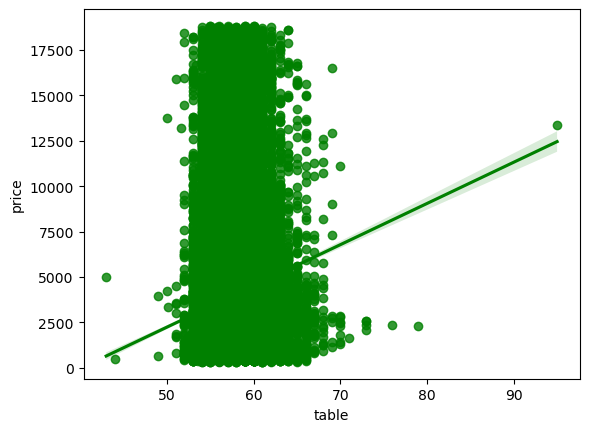

In [19]:
sns.regplot(x=a2['table'],y=y,color='green')

In [20]:
# Implementing Train Test Split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
x_train

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
19497,1.21,61.3,57.0,6.92,6.87,4.23,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
31229,0.31,62.0,56.0,4.38,4.36,2.71,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
22311,1.21,62.4,57.0,6.75,6.83,4.24,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
278,0.81,62.6,55.0,5.92,5.96,3.72,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
6646,0.79,61.7,56.0,5.94,5.95,3.67,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,1.05,62.4,59.0,6.48,6.51,4.05,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
44732,0.47,61.0,55.0,5.03,5.01,3.06,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
38158,0.33,60.3,58.0,4.49,4.46,2.70,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
860,0.90,62.8,59.0,6.13,6.03,3.82,0,0,1,0,...,0,0,1,0,1,0,0,0,0,0


In [21]:
y_train

19497     8131
31229      756
22311    10351
278       2795
6646      4092
         ...  
11284     4975
44732     1617
38158     1014
860       2871
15795     6320
Name: price, Length: 37758, dtype: int64

PREPROCESSING BY USING STANDARD SCALAR

In [22]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()

scalar.fit(x_train)

x_train=scalar.fit_transform(x_train)
x_test=scalar.fit_transform(x_test)

In [23]:
# model creation 
# Implementing RandomForestRegressor

model=RandomForestRegressor(n_estimators=100,criterion='squared_error')
model.fit(x_train,y_train)

y_pred=model.predict(x_test)
y_pred

array([  558.53,  2416.98,  1224.9 , ..., 12583.64,  3312.1 ,  1307.15])

PERFORMANCE EVALUATION

In [24]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_absolute_percentage_error
from sklearn.metrics import r2_score

In [25]:
print('Mean Absolute Error is',mean_absolute_error(y_test,y_pred))
print('Mean Squared Error is',mean_squared_error(y_test,y_pred))
print('Mean Absolute Percentage Error is',mean_absolute_percentage_error(y_test,y_pred))
mse=mean_squared_error(y_test,y_pred)
rsme=np.sqrt(mse)
print('Root Mean Square Error is',rsme)
print('Coefficient of determination (r2_score) is',r2_score(y_test,y_pred))

Mean Absolute Error is 309.4183730269082
Mean Squared Error is 422591.28112730075
Mean Absolute Percentage Error is 0.07690054368418488
Root Mean Square Error is 650.070212459624
Coefficient of determination (r2_score) is 0.9729038039231181


In [26]:
a3=pd.DataFrame({'Actual Value':y_test,'Predicted Value': y_pred})
a3

,Actual Value,Predicted Value
1388,559,558.53
50052,2201,2416.98
41645,1238,1224.90
42377,1304,1187.47
17244,6901,10270.22
...,...,...
29577,705,761.50
12564,5278,4893.92
24786,13157,12583.64
1332,2960,3312.10


EDA(Exploratory data analysis)

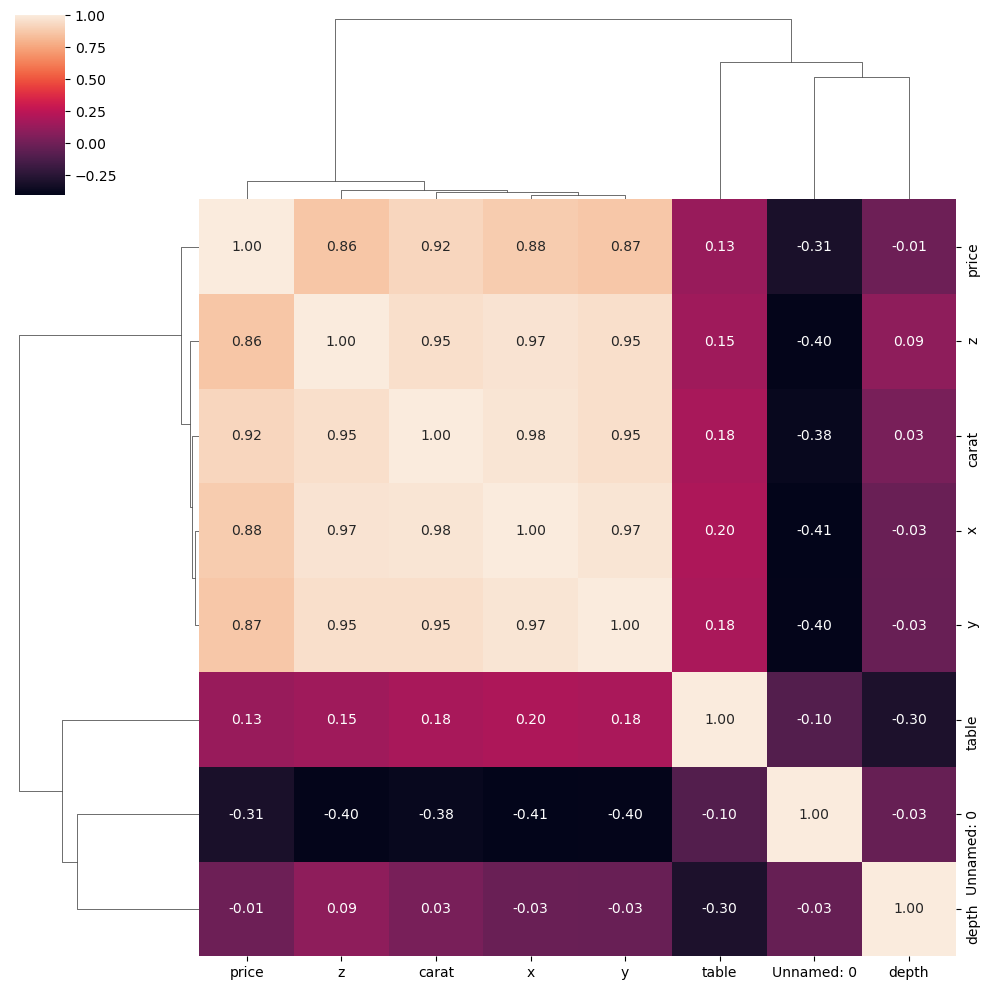

In [27]:
corr_matrix=a.corr()
sns.clustermap(corr_matrix,annot=True,fmt =".2f")
plt.show()

# Correlation of properties.

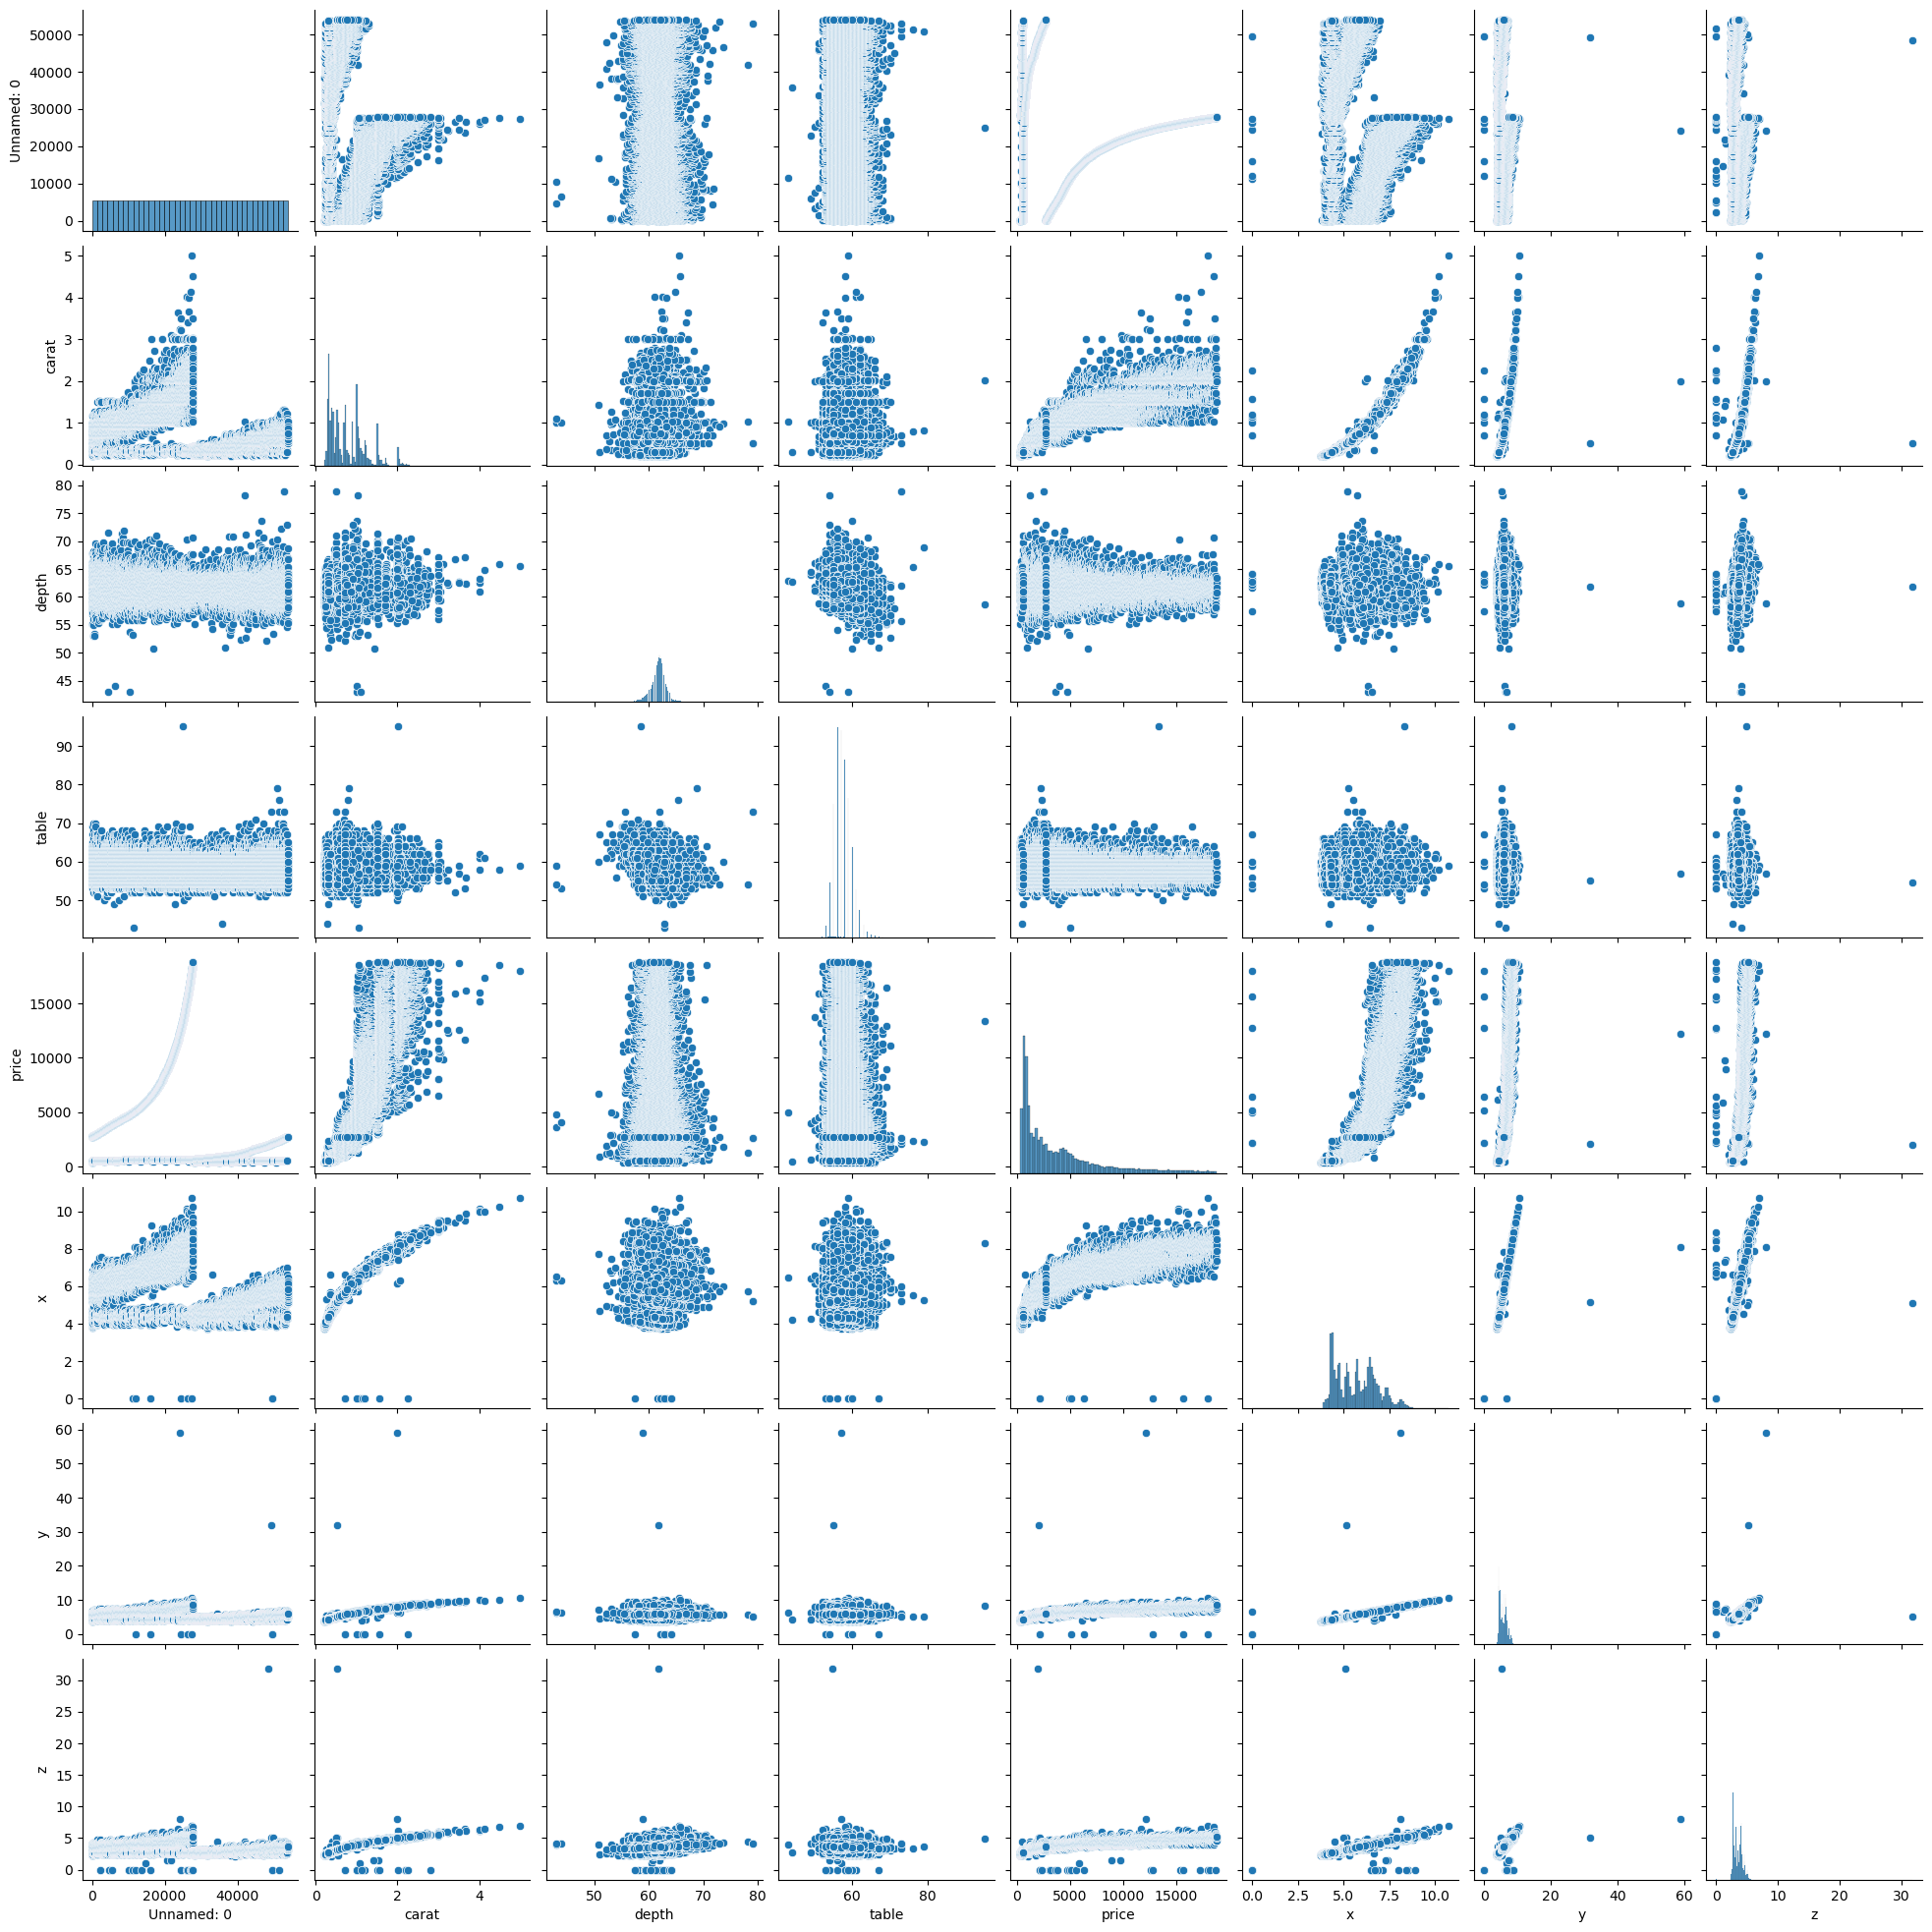

In [28]:
sns.pairplot(a)